## Basic Imports and Helper Functions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import List

In [2]:
def covert_lt_df(coord_list:List)->pd.DataFrame:
  """
  Function to convert the given list of Tuples into a dataframe
  """
  return pd.DataFrame(coord_list,columns=["Strike Price","Pay Off"])

In [3]:
def plot_payoff_structure(op_coordinates:List):
  """
  Method to plot Option Payoff Profile for a given structure
  """
  df = covert_lt_df(op_coordinates)
  plt.figure(figsize=(18,12),dpi=75)
  plt.style.use('seaborn')
  plt.plot(df["Strike Price"], df["Pay Off"], color="purple",linewidth = 2)
  plt.xlabel('Strike Price',fontweight='bold',fontsize = 15)
  plt.ylabel('Payoff',fontweight='bold',fontsize = 15)
  plt.title(f"Payoff Diagram",fontweight='bold',fontsize = 25)
  plt.xlim([0,60])
  plt.ylim([-40,40])
  plt.grid(visible=True)
  plt.axhline()
  plt.axvline()
  plt.show()

In [4]:
def compute_net_payoff(option_1:List,option_2:List)->List:
  """
  Method to compute the net payoff of two options
  """
  return [(a[0],a[1]+b[1]) for a,b in zip(option_1,option_2)]

# Sample Payoff Diagrams (For Understanding)

## a) For Call Option: Long and Short

In [5]:
# At all prices above the target we get profit
long_c_20 = covert_lt_df([(20,0),(30,10),(40,20),(50,30),(60,40)])
# At all prices above the target we get loss
short_c_30 = covert_lt_df([(30,0), (40,-10),(50,-20),(60,-30)])

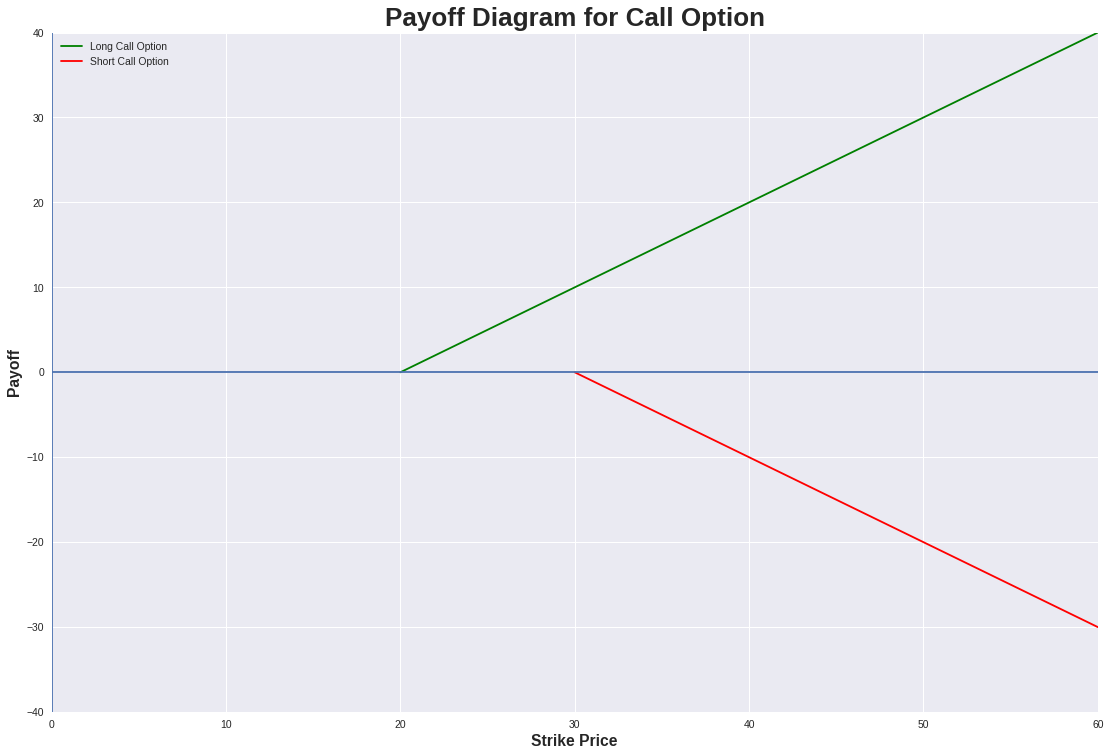

In [6]:
plt.figure(figsize=(18,12),dpi=75)
plt.style.use('seaborn')
plt.plot(long_c_20["Strike Price"], long_c_20["Pay Off"], color="green", label = "Long Call Option")
plt.plot(short_c_30["Strike Price"], short_c_30["Pay Off"], color="red", label = "Short Call Option")
plt.xlabel('Strike Price',fontweight='bold',fontsize = 15)
plt.ylabel('Payoff',fontweight='bold',fontsize = 15)
plt.title(f"Payoff Diagram for Call Option",fontweight='bold',fontsize = 25)
plt.xlim([0,60])
plt.ylim([-40,40])
plt.grid(visible=True)
plt.legend()
plt.axhline()
plt.axvline()
plt.show()

## b) For Put Option: Long and Short

In [7]:
# At all prices below the target we get profit
long_p_40 = covert_lt_df([(10,30),(20,20),(30,10),(40,0)])
# At all prices below the target we get loss
short_p_30 = covert_lt_df([(10,-20),(20,-10),(30,0)])

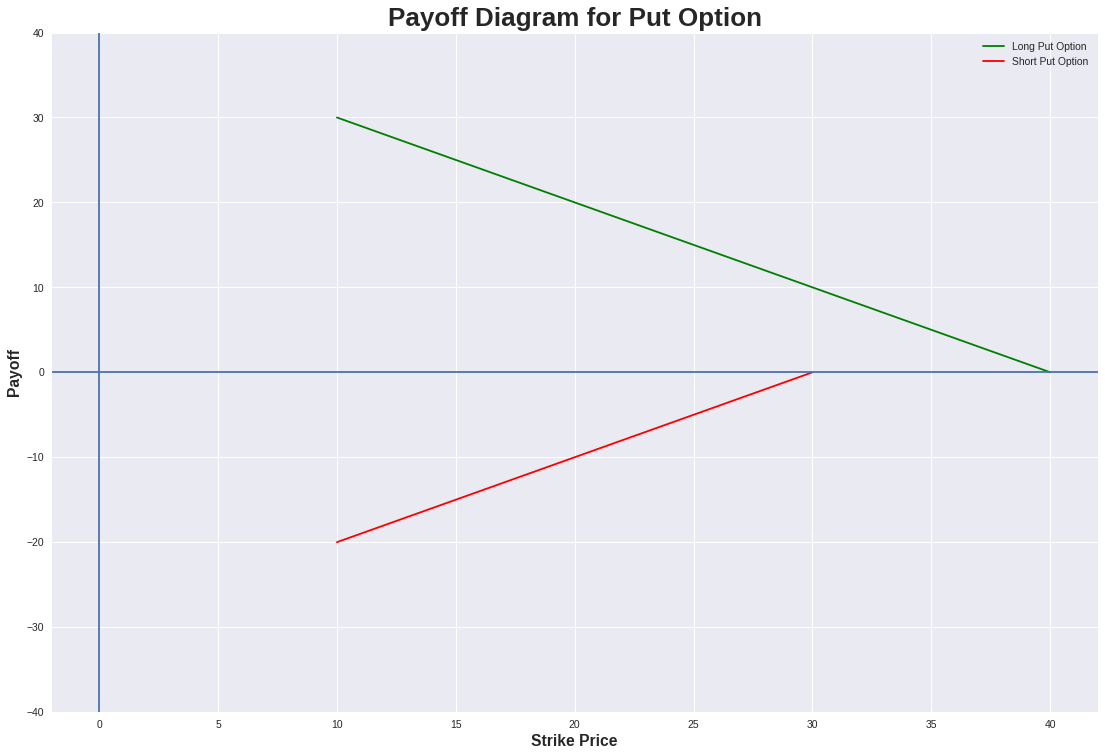

In [8]:
plt.figure(figsize=(18,12),dpi=75)
plt.style.use('seaborn')
plt.plot(long_p_40["Strike Price"], long_p_40["Pay Off"], color="green", label = "Long Put Option")
plt.plot(short_p_30["Strike Price"], short_p_30["Pay Off"], color="red", label = "Short Put Option")
plt.xlabel('Strike Price',fontweight='bold',fontsize = 15)
plt.ylabel('Payoff',fontweight='bold',fontsize = 15)
plt.title(f"Payoff Diagram for Put Option",fontweight='bold',fontsize = 25)
plt.ylim([-40,40])
plt.grid(visible=True)
plt.legend()
plt.axhline()
plt.axvline()
plt.show()

# Q1 Plot Payoff Profiles 

In [9]:
long_c_20 = [(10,0),(20,0),(30,10),(40,20),(50,30),(60,40)] # Lonf Call @ 20
short_c_30 = [(10,0),(20,0),(30,0), (40,-10),(50,-20),(60,-30)] # Short Call @ 30
long_c_40 = [(10,0),(20,0),(30,0),(40,0),(50,10),(60,20)] # Long Call @ 40
long_p_40 = [(10,30),(20,20),(30,10),(40,0)] # Long Put @ 40
short_p_30 = [(10,-20),(20,-10),(30,0),(40,0)] # Short Put @ 30
long_p_20 = [(10,10),(20,0),(30,0), (40,0)] # Long Put @ 20

## a) Long Call @ 20 and Short Call @ 30

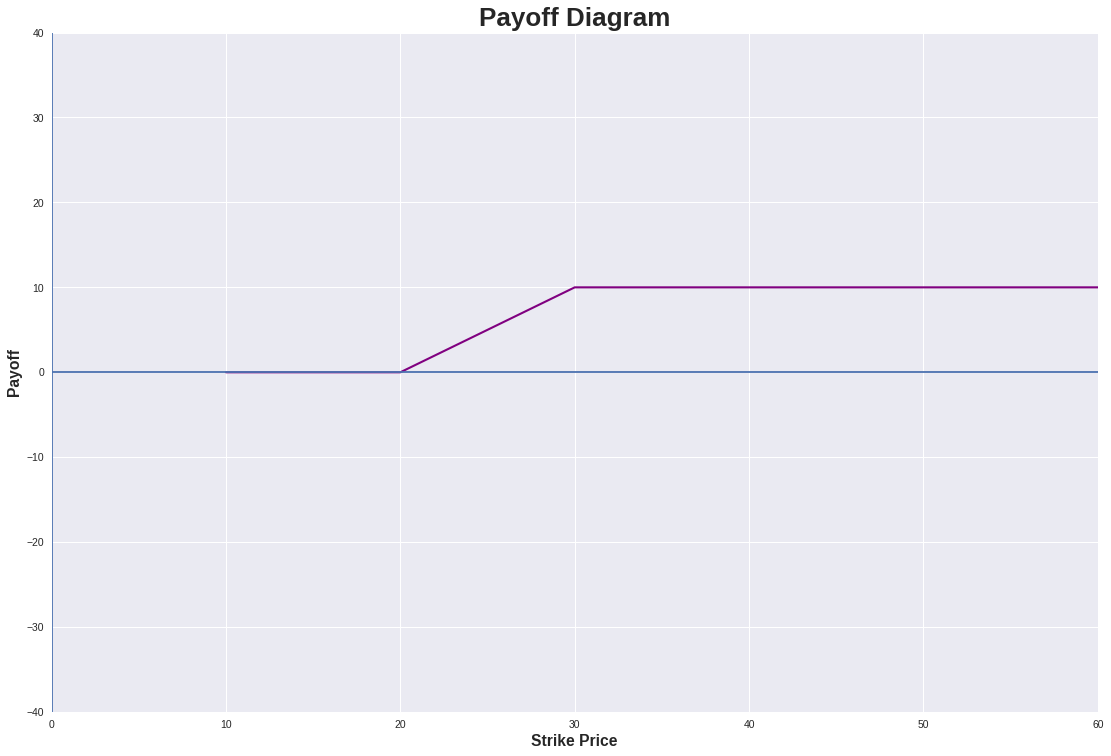

In [10]:
# Get the net payoff
portfolio_a = compute_net_payoff(long_c_20,short_c_30)
# Plot the payoff diagram
plot_payoff_structure(portfolio_a)

## b)	Long a Call @ 20 + Short 2 Calls @ 30 



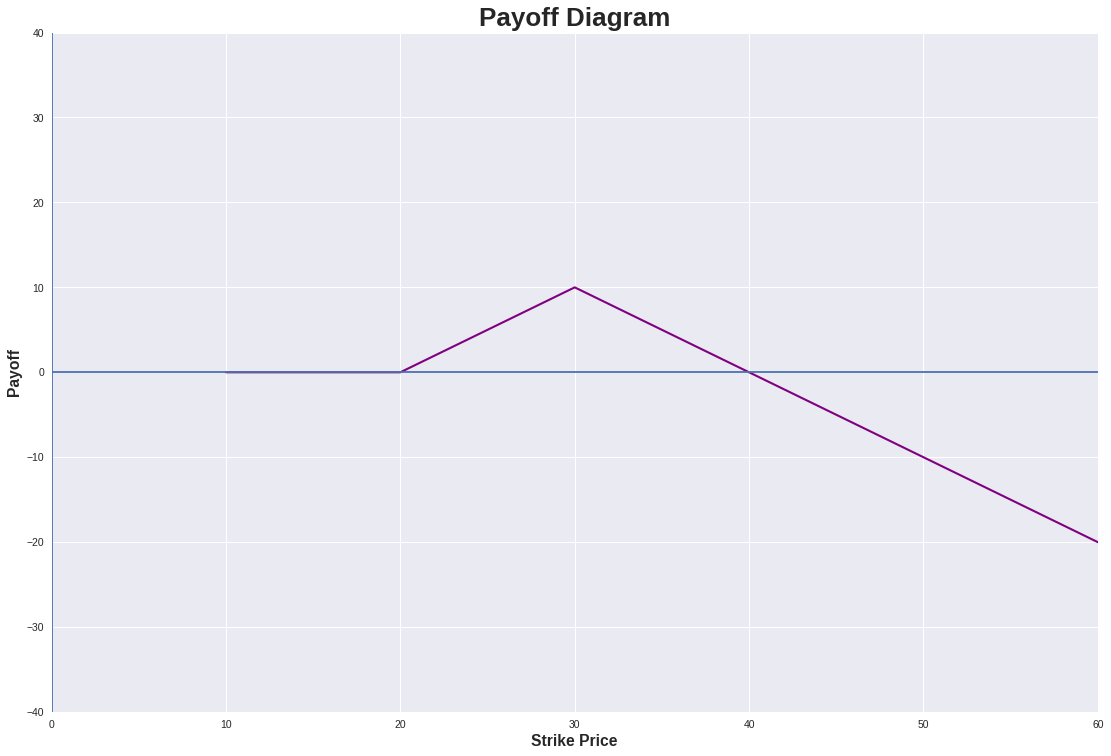

In [11]:
# Get the net payoff
portfolio_b = compute_net_payoff(portfolio_a,short_c_30)
# Plot the payoff diagram
plot_payoff_structure(portfolio_b)

## c) Long a Call @ 20 + Short 2 Calls @ 30 + Long Call @ 40 

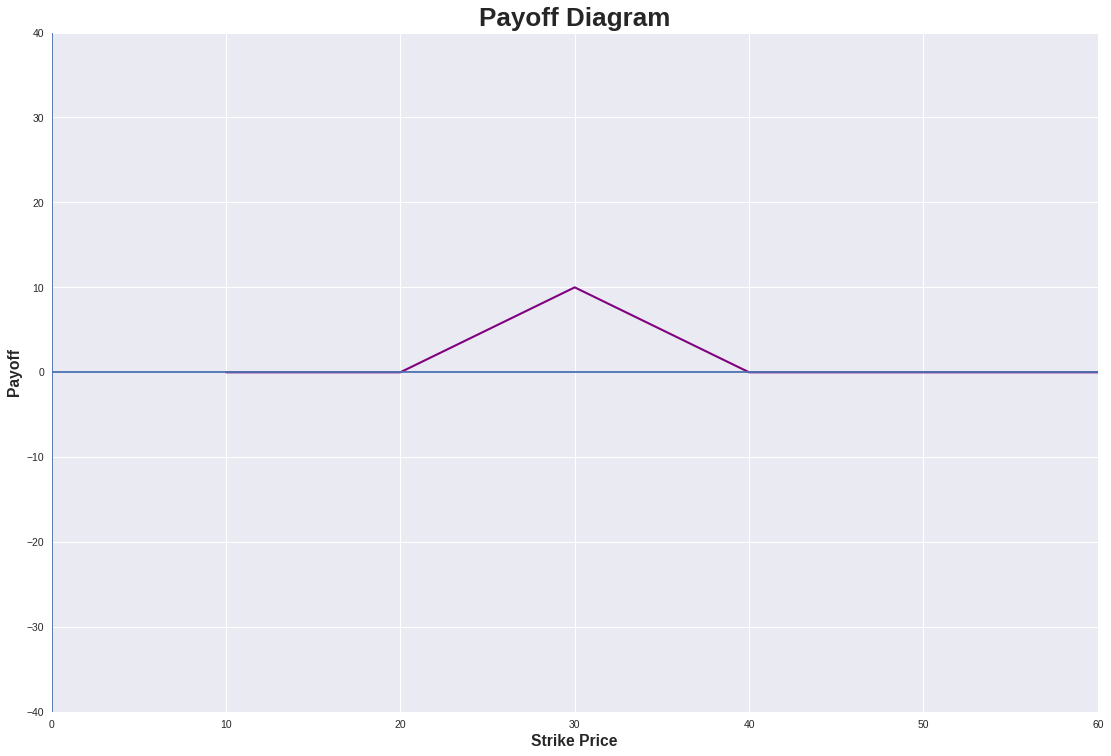

In [12]:
# Get the net payoff
portfolio_c = compute_net_payoff(portfolio_b,long_c_40)
# Plot the payoff diagram
plot_payoff_structure(portfolio_c)

## d)	Long a Put @ 40 + Short a Put @ 30


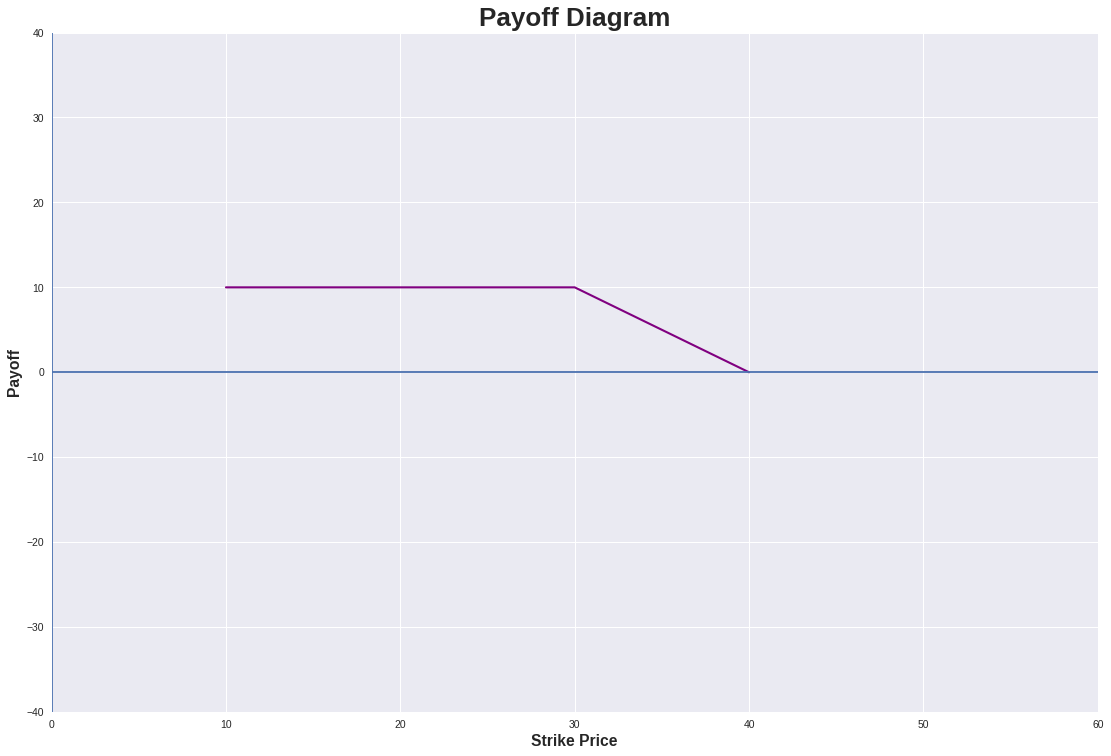

In [13]:
# Get the net payoff
portfolio_d = compute_net_payoff(long_p_40,short_p_30)
# Plot the payoff diagram
plot_payoff_structure(portfolio_d)

## e)	Long a Put @ 40 + Short 2 Puts @ 30 


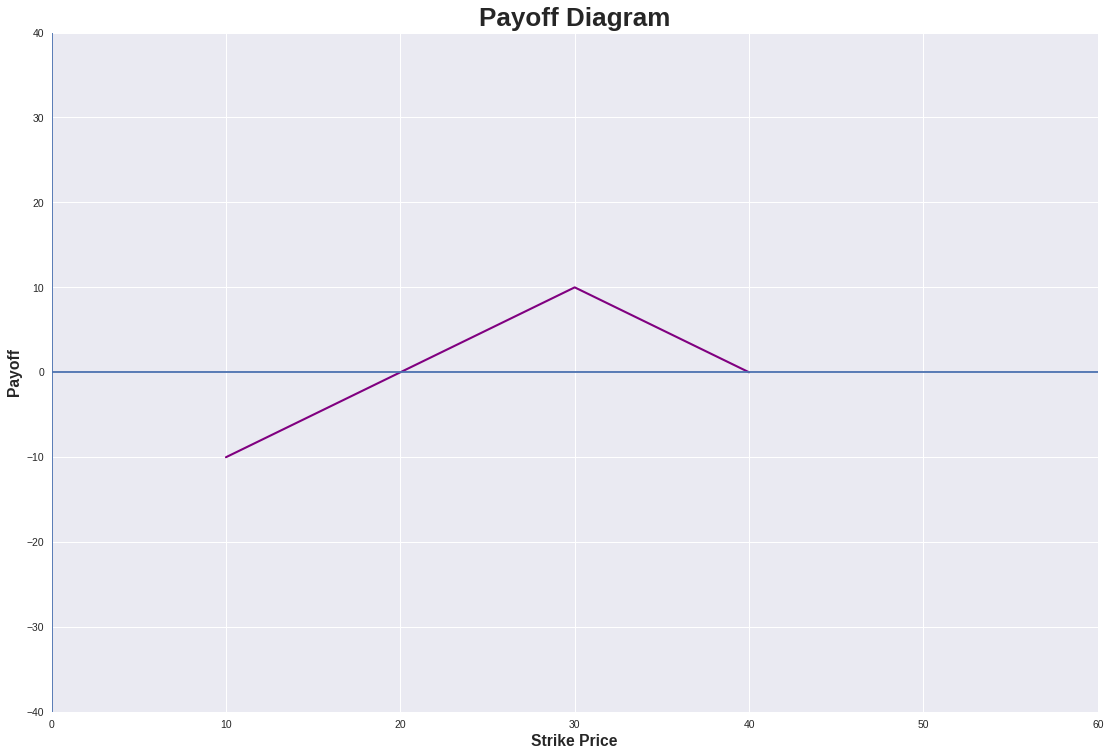

In [14]:
# Get the net payoff
portfolio_e = compute_net_payoff(portfolio_d,short_p_30)
# Plot the payoff diagram
plot_payoff_structure(portfolio_e)

## f) Long a Put @ 40 + Short 2 Puts @ 30 + Long a put @ 20

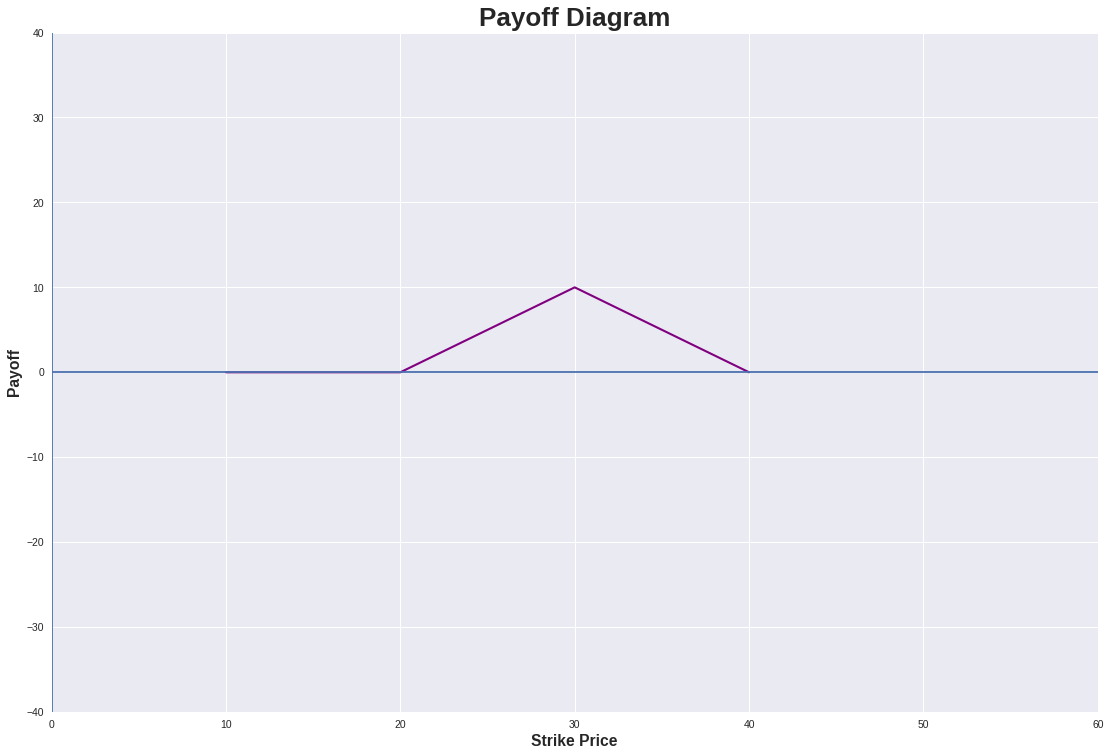

In [15]:
# Get the net payoff
portfolio_f = compute_net_payoff(portfolio_e,long_p_20)
# Plot the payoff diagram
plot_payoff_structure(portfolio_f)

# Q2  Determine a portfolio of call and put options with the following payoff profiles:

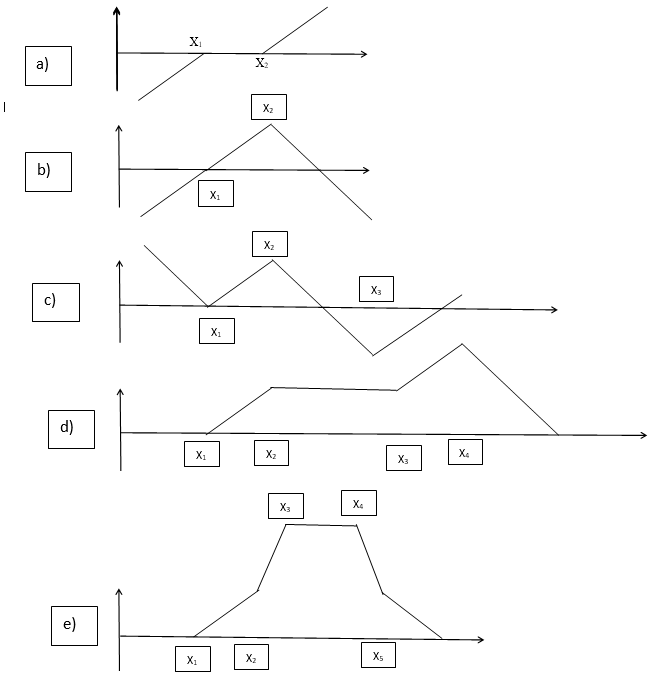

## Solutions

a. Short a Put@ $X_1$ and Long a Call@ $X_2$

b. Short a Put@ $X_1$, Long a Call@ $X_1$, Short $2$ Calls@ $X_2$

c. Long a Put@ $X_1$, Long a Call@ $X_1$, Short $2$ Calls@ $X_2$, Long 2 Calls@ $X_3$

d. Long a Call@ $X_1$, Short a Call @ $X_2$, Long a Call@ $X_3$, Short 2 Calls@ $X_4$, Long a Call @ $X_5$

e. Long a Call@ $X_1$, Long a Call@ $X_2$, Short 2 Calls@ $X_3$, Short 2 Calls@ $X_4$, Long a Call@ $X_5$, Long a Call@ $X_6$


> NOTE:
>
> - In Q2(d) the last point on the X-axis where the graph intersects in considered as $X_5$
> - In Q2(e) the last point on the X-axis where the graph intersects in considered as $X_6$